<a href="https://colab.research.google.com/github/Abir9288/EnergyEfficientGreanAIEnvironmentMonitoringSystem/blob/main/greanAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


In [ ]:
!pip install codecarbon

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.7/358.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.9.5
    Uninstalling psutil-5.9.5:
      Successfully uninstalled psutil-5.9.5
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
firebase-admin 6.9.0 requires httpx[http2]==0.28.1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("GlobalWeatherRepository.csv")

In [ ]:
X = df.drop(columns=["air_quality_us-epa-index"])
y = df["air_quality_us-epa-index"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:\n", y.value_counts())

Features shape: (115568, 40)
Target shape: (115568,)
Target classes:
 air_quality_us-epa-index
1    60842
2    36635
3     9603
4     6960
5     1098
6      430
Name: count, dtype: int64


In [ ]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["number"]).columns

print("Categorical columns:")
print(categorical_cols)

print("\nNumerical columns:")
print(numerical_cols)

Categorical columns:
Index(['country', 'location_name', 'timezone', 'last_updated',
       'condition_text', 'wind_direction', 'sunrise', 'sunset', 'moonrise',
       'moonset', 'moon_phase'],
      dtype='object')

Numerical columns:
Index(['latitude', 'longitude', 'last_updated_epoch', 'temperature_celsius',
       'temperature_fahrenheit', 'wind_mph', 'wind_kph', 'wind_degree',
       'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity',
       'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km',
       'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
       'air_quality_Carbon_Monoxide', 'air_quality_Ozone',
       'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide',
       'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_gb-defra-index',
       'moon_illumination'],
      dtype='object')


In [ ]:
X = X.drop(columns=["location_name", "timezone"])

In [ ]:
# Check class distribution
print(y.value_counts().sort_index())

air_quality_us-epa-index
1    60842
2    36635
3     9603
4     6960
5     1098
6      430
Name: count, dtype: int64


In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.select_dtypes(include=["object"]).columns:
    X[col] = le.fit_transform(X[col])

In [ ]:
print(X.select_dtypes(include=["object"]).columns)

Index([], dtype='object')


In [ ]:
X = df.drop(columns=["air_quality_us-epa-index"])
y = df["air_quality_us-epa-index"]

In [ ]:
pollutant_cols = [
    "air_quality_PM2.5",
    "air_quality_PM10",
    "air_quality_Ozone",
    "air_quality_Carbon_Monoxide",
    "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide"
]

X = X.drop(columns=pollutant_cols)

In [ ]:
print([c for c in X.columns if "air_quality" in c])

['air_quality_gb-defra-index']


In [ ]:
X = X.select_dtypes(include=["int64", "float64"])

LR

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
import numpy as np

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])

# Training with time measurement
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred) * 100
macro_precision = precision_score(y_test, y_pred, average="macro") * 100
macro_recall = recall_score(y_test, y_pred, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred, average="macro") * 100
class_labels = np.unique(y)

# Print Results
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Max iterations (epochs):", 1000)
print("Optimizer:", "lbfgs")
print("Batch size: N/A (full batch)")
print("Learning rate: N/A (solver controls internally)")

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred))

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Training Info ---------
Training time (seconds): 34.4462
Max iterations (epochs): 1000
Optimizer: lbfgs
Batch size: N/A (full batch)
Learning rate: N/A (solver controls internally)

--------- Performance Metrics ---------
Accuracy (%): 84.01
Macro Precision (%): 64.16
Macro Recall (%): 74.53
Macro F1-score (%): 64.2

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       1.00      0.80      0.89     12169
           2       0.74      0.94      0.82      7327
           3       0.80      0.97      0.88      1921
           4       0.93      0.54      0.68      1392
           5       0.24      0.58      0.34       219
           6       0.15      0.65      0.24        86

    accuracy                           0.84     23114
   macro avg       0.64      0.75      0.64     23114
w

Baseline Random Forest

In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Random Forest model
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced",
    n_jobs=-1
)

# -----------------------------
# Training with time measurement
# -----------------------------
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# -----------------------------
# Predictions
# -----------------------------
y_pred_rf = rf_model.predict(X_test)

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_rf) * 100
macro_precision = precision_score(y_test, y_pred_rf, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_rf, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_rf, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Number of trees (n_estimators):", 100)
print("Optimizer: N/A (Random Forest uses ensemble of decision trees)")
print("Batch size: N/A (tree-based models use full data)")
print("Learning rate: N/A")

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_rf))

from codecarbon import EmissionsTracker
import time

# Start tracker
tracker_rf = EmissionsTracker(project_name="Random_Forest_AQI")
start_time = time.time()

tracker_rf.start()

# Train model
rf_model.fit(X_train, y_train)

# Stop tracker
emissions_rf = tracker_rf.stop()
end_time = time.time()

print("Random Forest Training Time (s):", end_time - start_time)
print("Random Forest CO2 Emissions (kg):", emissions_rf)

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Training Info ---------
Training time (seconds): 15.478
Number of trees (n_estimators): 100
Optimizer: N/A (Random Forest uses ensemble of decision trees)
Batch size: N/A (tree-based models use full data)
Learning rate: N/A

--------- Performance Metrics ---------
Accuracy (%): 88.79
Macro Precision (%): 78.76
Macro Recall (%): 71.21
Macro F1-score (%): 73.28

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       0.95      0.88      0.91     12169
           2       0.80      0.91      0.85      7327
           3       0.98      0.90      0.94      1921
           4       0.87      0.98      0.92      1392
           5       0.48      0.18      0.26       219
           6       0.65      0.43      0.52        86

    accuracy                           0.89     23114
   macro av

[codecarbon WARNING @ 06:05:34] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 06:05:34] [setup] RAM Tracking...
[codecarbon INFO @ 06:05:34] [setup] CPU Tracking...
[codecarbon WARNING @ 06:05:36] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 06:05:36] CPU Model on constant consumption mode: AMD EPYC 7B12
[codecarbon WARNING @ 06:05:36] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 06:05:36] [setup] GPU Tracking...
[codecarbon INFO @ 06:05:36] No GPU found.
[codecarbon INFO @ 06:05:36] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecified
            
[codecarbon INFO @ 06:05:

Random Forest Training Time (s): 14.721669912338257
Random Forest CO2 Emissions (kg): 0.0003411637993864767


Optimized Random Forest

In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Optimized Random Forest model
# -----------------------------
rf_optimized = RandomForestClassifier(
    n_estimators=50,          # ↓ fewer trees (energy efficient)
    max_depth=12,             # ↓ shallower trees
    max_features="sqrt",      # ↓ fewer features per split
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# -----------------------------
# Training with CO2 tracking
# -----------------------------
train_tracker = EmissionsTracker(
    project_name="RF_Optimized_Training",
    output_dir=".",
    log_level="error"
)

train_tracker.start()
train_start = time.time()

rf_optimized.fit(X_train, y_train)

train_end = time.time()
training_time = train_end - train_start
training_emissions = train_tracker.stop()

# -----------------------------
# Inference with CO2 tracking
# -----------------------------
infer_tracker = EmissionsTracker(
    project_name="RF_Optimized_Inference",
    output_dir=".",
    log_level="error"
)

infer_tracker.start()
infer_start = time.time()

y_pred_rf = rf_optimized.predict(X_test)

infer_end = time.time()
inference_time = infer_end - infer_start
inference_emissions = infer_tracker.stop()

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_rf) * 100
macro_precision = precision_score(y_test, y_pred_rf, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_rf, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_rf, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("========= Optimized Random Forest =========")

print("\n--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Model Configuration ---------")
print("Number of trees:", 50)
print("Max depth:", 12)
print("Max features:", "sqrt")
print("Class weighting:", "balanced")

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Training CO2 emissions (kg):", round(training_emissions, 6))

print("\n--------- Inference Info ---------")
print("Inference time (seconds):", round(inference_time, 4))
print("Inference CO2 emissions (kg):", round(inference_emissions, 6))

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_rf))

[codecarbon WARNING @ 06:06:39] Multiple instances of codecarbon are allowed to run at the same time.


========= Optimized Random Forest =========

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Model Configuration ---------
Number of trees: 50
Max depth: 12
Max features: sqrt
Class weighting: balanced

--------- Training Info ---------
Training time (seconds): 7.0766
Training CO2 emissions (kg): 1e-06

--------- Inference Info ---------
Inference time (seconds): 0.1746
Inference CO2 emissions (kg): 0.0

--------- Performance Metrics ---------
Accuracy (%): 86.49
Macro Precision (%): 73.87
Macro Recall (%): 77.44
Macro F1-score (%): 75.23

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       0.99      0.82      0.90     12169
           2       0.75      0.92      0.83      7327
           3       0.80      0.97      0.88      1921
           4       0.91      0.91      0.91      1392
           5       0.43      0.44      

Decision Tree model

In [ ]:
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Decision Tree model
# -----------------------------
dt_model = DecisionTreeClassifier(
    max_depth=10,          # prevents overfitting
    class_weight="balanced",
    random_state=42
)

# -----------------------------
# Training with time measurement
# -----------------------------
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# -----------------------------
# Predictions
# -----------------------------
y_pred_dt = dt_model.predict(X_test)

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_dt) * 100
macro_precision = precision_score(y_test, y_pred_dt, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_dt, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_dt, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Max depth:", 10)
print("Optimizer: N/A (Decision Tree uses greedy splitting)")
print("Batch size: N/A (tree-based model uses full data)")
print("Learning rate: N/A")

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_dt))

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight="balanced"
)

tracker_dt = EmissionsTracker(project_name="Decision_Tree_AQI")

start_time = time.time()
tracker_dt.start()

dt_model.fit(X_train, y_train)

emissions_dt = tracker_dt.stop()
end_time = time.time()

print("Decision Tree Training Time (s):", round(end_time - start_time, 4))
print("Decision Tree CO2 Emissions (kg):", emissions_dt)


[codecarbon INFO @ 10:05:56] [setup] RAM Tracking...
[codecarbon INFO @ 10:05:56] [setup] CPU Tracking...
[codecarbon WARNING @ 10:05:56] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:05:56] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:05:56] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 10:05:56] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:05:56] [setup] GPU Tracking...
[codecarbon INFO @ 10:05:57] No GPU found.
[codecarbon INFO @ 10:05:57] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecif

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Training Info ---------
Training time (seconds): 2.3088
Max depth: 10
Optimizer: N/A (Decision Tree uses greedy splitting)
Batch size: N/A (tree-based model uses full data)
Learning rate: N/A

--------- Performance Metrics ---------
Accuracy (%): 85.65
Macro Precision (%): 67.37
Macro Recall (%): 78.41
Macro F1-score (%): 69.76

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       0.99      0.82      0.90     12169
           2       0.75      0.93      0.83      7327
           3       0.81      0.97      0.88      1921
           4       0.94      0.72      0.82      1392
           5       0.27      0.48      0.34       219
           6       0.28      0.79      0.42        86

    accuracy                           0.86     23114
   macro avg       0.67      0.78      0.70

[codecarbon INFO @ 10:05:57] Emissions data (if any) will be saved to file /content/emissions.csv
[codecarbon INFO @ 10:06:01] Energy consumed for RAM : 0.000013 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:06:01] Delta energy consumed for CPU with constant : 0.000055 kWh, power : 42.5 W
[codecarbon INFO @ 10:06:01] Energy consumed for All CPU : 0.000055 kWh
[codecarbon INFO @ 10:06:01] 0.000068 kWh of electricity and 0.000000 L of water were used since the beginning.


Decision Tree Training Time (s): 4.6762
Decision Tree CO2 Emissions (kg): 1.8090387380506963e-05


OPTIMIZED DECISION TREE

In [ ]:
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Optimized Decision Tree
# -----------------------------
dt_optimized = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=5,
    ccp_alpha=0.001,         # pruning parameter
    class_weight="balanced",
    random_state=42
)

# -----------------------------
# Training with CO2 tracking
# -----------------------------
train_tracker = EmissionsTracker(
    project_name="DT_Optimized_Training",
    output_dir=".",
    log_level="error"
)

train_tracker.start()
train_start = time.time()

dt_optimized.fit(X_train, y_train)

train_end = time.time()
training_time = train_end - train_start
training_emissions = train_tracker.stop()

# -----------------------------
# Inference with CO2 tracking
# -----------------------------
infer_tracker = EmissionsTracker(
    project_name="DT_Optimized_Inference",
    output_dir=".",
    log_level="error"
)

infer_tracker.start()
infer_start = time.time()

y_pred_dt = dt_optimized.predict(X_test)

infer_end = time.time()
inference_time = infer_end - infer_start
inference_emissions = infer_tracker.stop()

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_dt) * 100
macro_precision = precision_score(y_test, y_pred_dt, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_dt, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_dt, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("========= Optimized Decision Tree =========")

print("\n--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Model Configuration ---------")
print("Max depth:", 10)
print("Min samples per leaf:", 5)
print("Cost complexity pruning (ccp_alpha): 0.001")

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Training CO2 emissions (kg):", round(training_emissions, 6))

print("\n--------- Inference Info ---------")
print("Inference time (seconds):", round(inference_time, 4))
print("Inference CO2 emissions (kg):", round(inference_emissions, 6))

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_dt))

[codecarbon WARNING @ 10:06:32] Multiple instances of codecarbon are allowed to run at the same time.


========= Optimized Decision Tree =========

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Model Configuration ---------
Max depth: 10
Min samples per leaf: 5
Cost complexity pruning (ccp_alpha): 0.001

--------- Training Info ---------
Training time (seconds): 0.735
Training CO2 emissions (kg): 3e-06

--------- Inference Info ---------
Inference time (seconds): 0.0085
Inference CO2 emissions (kg): 0.0

--------- Performance Metrics ---------
Accuracy (%): 84.11
Macro Precision (%): 65.4
Macro Recall (%): 77.83
Macro F1-score (%): 66.86

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       1.00      0.80      0.89     12169
           2       0.74      0.92      0.82      7327
           3       0.76      0.99      0.86      1921
           4       0.95      0.61      0.74      1392
           5       0.22      0.54      

Gradient Boosting

In [ ]:
import time
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Gradient Boosting model
# -----------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# -----------------------------
# Training with time measurement
# -----------------------------
start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()

training_time = end_time - start_time

# -----------------------------
# Predictions
# -----------------------------
y_pred_gb = gb_model.predict(X_test)

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_gb) * 100
macro_precision = precision_score(y_test, y_pred_gb, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_gb, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_gb, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Number of estimators (n_estimators):", 100)
print("Learning rate:", 0.1)
print("Max depth:", 3)
print("Optimizer: N/A (Gradient Boosting uses stage-wise additive trees)")
print("Batch size: N/A (tree-based model uses full data)")

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_gb))

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

tracker_gb = EmissionsTracker(project_name="Gradient_Boosting_AQI")

start_time = time.time()
tracker_gb.start()

gb_model.fit(X_train, y_train)

emissions_gb = tracker_gb.stop()
end_time = time.time()

print("Gradient Boosting Training Time (s):", round(end_time - start_time, 4))
print("Gradient Boosting CO2 Emissions (kg):", emissions_gb)

[codecarbon INFO @ 10:14:26] [setup] RAM Tracking...
[codecarbon INFO @ 10:14:26] [setup] CPU Tracking...
[codecarbon WARNING @ 10:14:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:14:26] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:14:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 10:14:26] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:14:26] [setup] GPU Tracking...
[codecarbon INFO @ 10:14:26] No GPU found.
[codecarbon INFO @ 10:14:26] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation model
                CPU Tracking Method: global constant
                GPU Tracking Method: Unspecif

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Training Info ---------
Training time (seconds): 231.9068
Number of estimators (n_estimators): 100
Learning rate: 0.1
Max depth: 3
Optimizer: N/A (Gradient Boosting uses stage-wise additive trees)
Batch size: N/A (tree-based model uses full data)

--------- Performance Metrics ---------
Accuracy (%): 87.84
Macro Precision (%): 72.84
Macro Recall (%): 67.01
Macro F1-score (%): 67.77

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       0.98      0.83      0.90     12169
           2       0.76      0.97      0.85      7327
           3       1.00      0.89      0.94      1921
           4       0.84      0.96      0.90      1392
           5       0.46      0.12      0.19       219
           6       0.34      0.26      0.29        86

    accuracy                           0.8

[codecarbon INFO @ 10:14:41] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:14:41] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:14:41] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 10:14:41] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 10:14:56] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:14:56] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:14:56] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 10:14:56] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon INFO @ 10:15:11] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:15:11] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:15:11] Energy consumed for All CPU

Gradient Boosting Training Time (s): 227.5845
Gradient Boosting CO2 Emissions (kg): 0.0008877257471837294


Optimized Gradient Boosting

In [ ]:
import time
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from codecarbon import EmissionsTracker

# -----------------------------
# Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# -----------------------------
# Gradient Boosting model
# -----------------------------
gb_model = GradientBoostingClassifier(
    n_estimators=200,       # more trees for stability
    learning_rate=0.05,     # lower to reduce overfitting
    max_depth=5,            # shallow trees = faster + efficient
    min_samples_leaf=5,
    subsample=0.8,          # stochastic gradient boosting
    random_state=42
)

# -----------------------------
# Energy tracking
# -----------------------------
tracker = EmissionsTracker(project_name="Optimized_GB")
tracker.start()

# -----------------------------
# Training with time measurement
# -----------------------------
start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# -----------------------------
# Inference with time measurement
# -----------------------------
start_inf = time.time()
y_pred_gb = gb_model.predict(X_test)
end_inf = time.time()
inference_time = end_inf - start_inf

# -----------------------------
# Energy measurement
# -----------------------------
emissions_kg = tracker.stop()

# -----------------------------
# Evaluation Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_gb) * 100
macro_precision = precision_score(y_test, y_pred_gb, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_gb, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_gb, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("========= Optimized Gradient Boosting =========\n")
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Model Configuration ---------")
print("Number of trees (n_estimators):", 200)
print("Learning rate:", 0.05)
print("Max depth:", 5)
print("Min samples per leaf:", 5)
print("Subsample:", 0.8)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Training CO2 emissions (kg):", round(emissions_kg, 8))

print("\n--------- Inference Info ---------")
print("Inference time (seconds):", round(inference_time, 6))
print("Inference CO2 emissions (kg):", 0.0)  # negligible

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

print("\n--------- Detailed Classification Report ---------")
print(classification_report(y_test, y_pred_gb))

[codecarbon WARNING @ 10:18:46] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:18:46] [setup] RAM Tracking...
[codecarbon INFO @ 10:18:46] [setup] CPU Tracking...
[codecarbon WARNING @ 10:18:46] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:18:46] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:18:46] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 10:18:46] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:18:46] [setup] GPU Tracking...
[codecarbon INFO @ 10:18:46] No GPU found.
[codecarbon INFO @ 10:18:46] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

========= Optimized Gradient Boosting =========

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [1 2 3 4 5 6]

--------- Model Configuration ---------
Number of trees (n_estimators): 200
Learning rate: 0.05
Max depth: 5
Min samples per leaf: 5
Subsample: 0.8

--------- Training Info ---------
Training time (seconds): 596.3475
Training CO2 emissions (kg): 0.0023299

--------- Inference Info ---------
Inference time (seconds): 0.860206
Inference CO2 emissions (kg): 0.0

--------- Performance Metrics ---------
Accuracy (%): 88.54
Macro Precision (%): 80.06
Macro Recall (%): 75.39
Macro F1-score (%): 76.53

--------- Detailed Classification Report ---------
              precision    recall  f1-score   support

           1       0.97      0.85      0.90     12169
           2       0.77      0.95      0.85      7327
           3       1.00      0.89      0.94      1921
           4       0.89      0.97      0.93      139

DNN

In [ ]:
drop_cols = [
    'location_name', 'last_updated',
    'sunrise', 'sunset', 'moonrise', 'moonset'
]

df = df.drop(columns=drop_cols, errors='ignore')

In [ ]:
df['AQI_category'] = df['air_quality_us-epa-index'].astype(int)

In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=df.select_dtypes(include='object').columns,
    drop_first=True
)

In [ ]:
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# Dataset preparation
# -----------------------------
X = df_encoded.drop('AQI_category', axis=1)
y = df_encoded['AQI_category'] - 1   # classes 0–5

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Train-test split (same as RF)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# One-hot encoding
y_train_cat = to_categorical(y_train, num_classes=6)
y_test_cat = to_categorical(y_test, num_classes=6)

# -----------------------------
# DNN model
# -----------------------------
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# Early stopping
# -----------------------------
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# -----------------------------
# Training with time measurement
# -----------------------------
start_time = time.time()

history = model.fit(
    X_train,
    y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time

# -----------------------------
# Predictions
# -----------------------------
y_pred_prob = model.predict(X_test)
y_pred_dnn = np.argmax(y_pred_prob, axis=1)

# -----------------------------
# Evaluation Metrics (same as RF)
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_dnn) * 100
macro_precision = precision_score(y_test, y_pred_dnn, average="macro") * 100
macro_recall = recall_score(y_test, y_pred_dnn, average="macro") * 100
macro_f1 = f1_score(y_test, y_pred_dnn, average="macro") * 100
class_labels = np.unique(y)

# -----------------------------
# Print Results
# -----------------------------
print("--------- Dataset Info ---------")
print("Total samples:", len(X))
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))
print("Class labels:", class_labels)

print("\n--------- Training Info ---------")
print("Training time (seconds):", round(training_time, 4))
print("Optimizer: Adam")
print("Batch size:", 256)
print("Learning rate: Adaptive (Adam)")
print("Epochs trained:", len(history.history['loss']))

print("\n--------- Performance Metrics ---------")
print("Accuracy (%):", round(accuracy, 2))
print("Macro Precision (%):", round(macro_precision, 2))
print("Macro Recall (%):", round(macro_recall, 2))
print("Macro F1-score (%):", round(macro_f1, 2))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

tracker_dnn = EmissionsTracker(project_name="DNN_AQI")

start_time = time.time()
tracker_dnn.start()

# Train DNN
history = model.fit(
    X_train,
    y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)

emissions_dnn = tracker_dnn.stop()
end_time = time.time()

print("DNN Training Time (s):", round(end_time - start_time, 4))
print("DNN CO2 Emissions (kg):", emissions_dnn)

Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6635 - loss: 0.8387 - val_accuracy: 0.9759 - val_loss: 0.0940
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9522 - loss: 0.1422 - val_accuracy: 0.9918 - val_loss: 0.0427
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9795 - loss: 0.0620 - val_accuracy: 0.9953 - val_loss: 0.0222
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9853 - loss: 0.0444 - val_accuracy: 0.9971 - val_loss: 0.0221
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9890 - loss: 0.0312 - val_accuracy: 0.9968 - val_loss: 0.0172
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9922 - loss: 0.0249 - val_accuracy: 0.9977 - val_loss: 0.0168
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9970 - val_loss: 0.0143
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9941 - loss: 0.0189 - val_ac

[codecarbon WARNING @ 10:38:04] Multiple instances of codecarbon are allowed to run at the same time.
[codecarbon INFO @ 10:38:04] [setup] RAM Tracking...
[codecarbon INFO @ 10:38:04] [setup] CPU Tracking...
[codecarbon WARNING @ 10:38:04] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon WARNING @ 10:38:04] No CPU tracking mode found. Falling back on estimation based on TDP for CPU. 
 Linux OS detected: Please ensure RAPL files exist, and are readable, at /sys/class/powercap/intel-rapl/subsystem to measure CPU

[codecarbon INFO @ 10:38:04] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon WARNING @ 10:38:04] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon INFO @ 10:38:04] [setup] GPU Tracking...
[codecarbon INFO @ 10:38:04] No GPU found.
[codecarbon INFO @ 10:38:04] The below tracking methods have been set up:
                RAM Tracking Method: RAM power estimation mo

--------- Dataset Info ---------
Total samples: 115568
Training samples: 92454
Testing samples: 23114
Class labels: [0 1 2 3 4 5]

--------- Training Info ---------
Training time (seconds): 95.3413
Optimizer: Adam
Batch size: 256
Learning rate: Adaptive (Adam)
Epochs trained: 36

--------- Performance Metrics ---------
Accuracy (%): 99.96
Macro Precision (%): 99.16
Macro Recall (%): 99.66
Macro F1-score (%): 99.4
Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9984 - loss: 0.0050 - val_accuracy: 0.9988 - val_loss: 0.0251
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9983 - loss: 0.0054 - val_accuracy: 0.9988 - val_loss: 0.0217
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9992 - val_loss: 0.0208
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.9994 - val_loss: 0.0181
Epoch 5/100
 42/289 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy

[codecarbon INFO @ 10:38:20] Energy consumed for RAM : 0.000042 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:38:20] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:38:20] Energy consumed for All CPU : 0.000177 kWh
[codecarbon INFO @ 10:38:20] 0.000219 kWh of electricity and 0.000000 L of water were used since the beginning.


289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9979 - loss: 0.0063 - val_accuracy: 0.9992 - val_loss: 0.0188
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9988 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0225
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9994 - val_loss: 0.0261
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9983 - val_loss: 0.0364
Epoch 9/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9985 - loss: 0.0049 - val_accuracy: 0.9994 - val_loss: 0.0255
Epoch 10/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9985 - loss: 0.0054 - val_accuracy: 0.9995 - val_loss: 0.0268
Epoch 11/100
  1/289 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 1.0000 - loss: 3.6879e-04

[codecarbon INFO @ 10:38:35] Energy consumed for RAM : 0.000083 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:38:35] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:38:35] Energy consumed for All CPU : 0.000354 kWh
[codecarbon INFO @ 10:38:35] 0.000437 kWh of electricity and 0.000000 L of water were used since the beginning.


289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0375
Epoch 12/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9994 - val_loss: 0.0298
Epoch 13/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9996 - val_loss: 0.0253
Epoch 14/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9982 - loss: 0.0056 - val_accuracy: 0.9992 - val_loss: 0.0308
Epoch 15/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9995 - val_loss: 0.0295
Epoch 16/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9991 - loss: 0.0040

[codecarbon INFO @ 10:38:50] Energy consumed for RAM : 0.000125 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:38:50] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:38:50] Energy consumed for All CPU : 0.000531 kWh
[codecarbon INFO @ 10:38:50] 0.000656 kWh of electricity and 0.000000 L of water were used since the beginning.


289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9994 - val_loss: 0.0318
Epoch 17/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9996 - val_loss: 0.0304
Epoch 18/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9989 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0286
Epoch 19/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9990 - loss: 0.0029 - val_accuracy: 0.9994 - val_loss: 0.0284
Epoch 20/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0248
Epoch 21/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9997 - val_loss: 0.0284
Epoch 22/100
 17/289 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9991 - loss: 0.0014

[codecarbon INFO @ 10:39:05] Energy consumed for RAM : 0.000167 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:39:05] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:39:05] Energy consumed for All CPU : 0.000708 kWh
[codecarbon INFO @ 10:39:05] 0.000875 kWh of electricity and 0.000000 L of water were used since the beginning.


289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9990 - loss: 0.0026 - val_accuracy: 0.9996 - val_loss: 0.0302
Epoch 23/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9992 - val_loss: 0.0310
Epoch 24/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9997 - val_loss: 0.0276
Epoch 25/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9987 - loss: 0.0043 - val_accuracy: 0.9997 - val_loss: 0.0241
Epoch 26/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9992 - loss: 0.0021

[codecarbon INFO @ 10:39:20] Energy consumed for RAM : 0.000208 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:39:20] Delta energy consumed for CPU with constant : 0.000177 kWh, power : 42.5 W
[codecarbon INFO @ 10:39:20] Energy consumed for All CPU : 0.000885 kWh
[codecarbon INFO @ 10:39:20] 0.001093 kWh of electricity and 0.000000 L of water were used since the beginning.


289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9992 - loss: 0.0021 - val_accuracy: 0.9997 - val_loss: 0.0225
Epoch 27/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9994 - val_loss: 0.0278
Epoch 28/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0279
Epoch 29/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.9996 - val_loss: 0.0312
Epoch 30/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9991 - loss: 0.0027 - val_accuracy: 0.9996 - val_loss: 0.0306
Epoch 31/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9990 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0432


[codecarbon INFO @ 10:39:34] Energy consumed for RAM : 0.000249 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 10:39:34] Delta energy consumed for CPU with constant : 0.000171 kWh, power : 42.5 W
[codecarbon INFO @ 10:39:34] Energy consumed for All CPU : 0.001057 kWh
[codecarbon INFO @ 10:39:34] 0.001305 kWh of electricity and 0.000000 L of water were used since the beginning.
[codecarbon WARNING @ 10:39:34] The CSV format has changed, backing up old emission file.


DNN Training Time (s): 89.5617
DNN CO2 Emissions (kg): 0.0003492941761441426


Optimized DNN

In [ ]:
import time
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Assuming df_encoded is already your cleaned dataset
X = df_encoded.drop('AQI_category', axis=1)
y = df_encoded['AQI_category'] - 1  # classes 0–5

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# One-hot encoding
num_classes = 6
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [ ]:
teacher_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

teacher_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)

# Train teacher
start_time = time.time()
teacher_history = teacher_model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=256,
    callbacks=[early_stop],
    verbose=1
)
end_time = time.time()
print(f" Teacher trained in {round(end_time - start_time, 2)} seconds")

Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.6157 - loss: 0.9361 - val_accuracy: 0.9719 - val_loss: 0.1243
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9415 - loss: 0.1687 - val_accuracy: 0.9930 - val_loss: 0.0374
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9768 - loss: 0.0678 - val_accuracy: 0.9949 - val_loss: 0.0270
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9842 - loss: 0.0464 - val_accuracy: 0.9963 - val_loss: 0.0255
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9888 - loss: 0.0330 - val_accuracy: 0.9971 - val_loss: 0.0211
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9917 - loss: 0.0267 - val_accuracy: 0.9965 - val_loss: 0.0205
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9922 - loss: 0.0243 - val_accuracy: 0.9977 - val_loss: 0.0185
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9934 - loss: 0.0194 - val

In [ ]:
student_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

student_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Soft targets from teacher
teacher_logits = teacher_model.predict(X_train)
temperature = 5.0

def distillation_loss(y_true, y_pred):
    y_true_soft = tf.nn.softmax(y_true / temperature)
    y_pred_soft = tf.nn.softmax(y_pred / temperature)
    return tf.keras.losses.KLDivergence()(y_true_soft, y_pred_soft)

# Compile student with distillation loss
student_model.compile(
    optimizer='adam',
    loss=distillation_loss,
    metrics=['accuracy']
)

# Train student
student_history = student_model.fit(
    X_train, teacher_logits,
    validation_split=0.2,
    epochs=50,
    batch_size=256,
    verbose=1
)

2890/2890 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
Epoch 1/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6364 - loss: 0.0017 - val_accuracy: 0.9802 - val_loss: 1.8378e-04
Epoch 2/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 1.4315e-04 - val_accuracy: 0.9850 - val_loss: 1.1075e-04
Epoch 3/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9856 - loss: 1.0360e-04 - val_accuracy: 0.9847 - val_loss: 1.0354e-04
Epoch 4/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9844 - loss: 1.0500e-04 - val_accuracy: 0.9851 - val_loss: 9.7489e-05
Epoch 5/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9857 - loss: 9.2858e-05 - val_accuracy: 0.9853 - val_loss: 9.1867e-05
Epoch 6/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9864 - loss: 8.5546e-05 - val_accuracy: 0.9857 - val_loss: 8.9564e-05
Epoch 7/50
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9865 - loss: 8.1382e-05 - val_accuracy: 0.9857 - val_loss: 8.7201e-05
Epoch 8/5

In [ ]:
y_pred_prob = student_model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, average='macro') * 100
recall = recall_score(y_test, y_pred, average='macro') * 100
f1 = f1_score(y_test, y_pred, average='macro') * 100

print("--------- Student DNN Performance ---------")
print(f"Accuracy: {round(accuracy,2)}%")
print(f"Macro Precision: {round(precision,2)}%")
print(f"Macro Recall: {round(recall,2)}%")
print(f"Macro F1: {round(f1,2)}%")

723/723 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
--------- Student DNN Performance ---------
Accuracy: 98.61%
Macro Precision: 63.88%
Macro Recall: 66.58%
Macro F1: 65.17%


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Convert to TFLite with dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(student_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open("student_model_quantized.tflite", "wb") as f:
    f.write(tflite_model)

print(" Student model quantized and saved as 'student_model_quantized.tflite'")

Saved artifact at '/tmp/tmp1nvc26uj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 505), dtype=tf.float32, name='keras_tensor_26')
Output Type:
  TensorSpec(shape=(None, 6), dtype=tf.float32, name=None)
Captures:
  136329204121680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136329204123984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136329204135312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136329204132624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136329204133776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136329204134352: TensorSpec(shape=(), dtype=tf.resource, name=None)
 Student model quantized and saved as 'student_model_quantized.tflite'


In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

# -----------------------------
# Load TFLite model
# -----------------------------
interpreter = tf.lite.Interpreter(model_path="student_model_quantized.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# -----------------------------
# Run inference and measure time
# -----------------------------
start_time = time.time()

# Prepare full test set as float32
X_test_float = X_test.astype(np.float32)
y_pred_tflite = []

for i in range(len(X_test_float)):
    interpreter.set_tensor(input_details[0]['index'], X_test_float[i:i+1])
    interpreter.invoke()
    pred = interpreter.get_tensor(output_details[0]['index'])
    y_pred_tflite.append(np.argmax(pred, axis=1)[0])

end_time = time.time()
inference_time = end_time - start_time

# -----------------------------
# Compute metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred_tflite) * 100
macro_precision = precision_score(y_test, y_pred_tflite, average='macro') * 100
macro_recall = recall_score(y_test, y_pred_tflite, average='macro') * 100
macro_f1 = f1_score(y_test, y_pred_tflite, average='macro') * 100

# -----------------------------
# Estimate CO2 emission (approximate)
# -----------------------------
# Assume 0.00005 kg CO2 per second of inference (typical for small CPU model)
co2_emission = inference_time * 0.00005  # kg CO2

# -----------------------------
# Print Results
# -----------------------------
print("------ Final Student Model Metrics (Quantized) ------")
print(f"Accuracy (%):       {accuracy:.2f}")
print(f"Macro Precision (%): {macro_precision:.2f}")
print(f"Macro Recall (%):    {macro_recall:.2f}")
print(f"Macro F1-score (%):  {macro_f1:.2f}")
print(f"Inference time (s):  {inference_time:.4f}")
print(f"Estimated CO2 (kg): {co2_emission:.6f}")

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


------ Final Student Model Metrics (Quantized) ------
Accuracy (%):       98.59
Macro Precision (%): 63.84
Macro Recall (%):    66.56
Macro F1-score (%):  65.14
Inference time (s):  0.3839
Estimated CO2 (kg): 0.000019


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
student_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │        32,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,988 (406.21 KB)

 Trainable params: 34,662 (135.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,326 (270.81 KB)

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Assuming y_train contains integer class labels (0 to 5)
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(0.31658208863230125), 1: np.float64(0.5257608844001638), 2: np.float64(2.0058578495183546), 3: np.float64(2.7674209770114944), 4: np.float64(17.53014789533561), 5: np.float64(44.79360465116279)}


In [ ]:
import tensorflow as tf

# Temperature for distillation
temperature = 5.0
alpha = 0.5  # balance between teacher loss and student loss

# Custom distillation loss
def distillation_loss(y_true, y_pred, teacher_preds):
    # Categorical crossentropy with hard labels
    hard_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
    # KL divergence with soft labels
    soft_loss = tf.keras.losses.KLDivergence()(
        tf.nn.softmax(teacher_preds / temperature),
        tf.nn.softmax(y_pred / temperature)
    )
    return alpha * hard_loss + (1 - alpha) * soft_loss

In [ ]:
student_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # use distillation_loss if teacher available
    metrics=['accuracy']
)

history = student_model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=256,
    class_weight=class_weights_dict
)

Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9857 - loss: 5.9350 - val_accuracy: 0.9982 - val_loss: 0.0145
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9988 - loss: 0.0707 - val_accuracy: 0.9990 - val_loss: 0.0085
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9995 - loss: 0.0340 - val_accuracy: 0.9991 - val_loss: 0.0082
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9999 - loss: 0.0121 - val_accuracy: 0.9991 - val_loss: 0.0101
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9999 - loss: 0.0070 - val_accuracy: 0.9992 - val_loss: 0.0084
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0094
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9994 - val_loss: 0.0099
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 

In [ ]:
import time
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# -------------------------------
# 1. Predict on test set
# -------------------------------
start_time = time.time()
y_pred_probs = student_model.predict(X_test)
inference_time = time.time() - start_time

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# -------------------------------
# 2. Compute metrics
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

macro_precision = report['macro avg']['precision']
macro_recall = report['macro avg']['recall']
macro_f1 = report['macro avg']['f1-score']

# -------------------------------
# 3. Estimate CO2 (roughly)
# -------------------------------
# You can use your previous formula, e.g. CO2 (kg) = inference_time * 0.00005
co2_emission = inference_time * 0.00005

# -------------------------------
# 4. Print results
# -------------------------------
print("Student Model Evaluation:")
print(f"Accuracy (%):       {accuracy*100:.2f}")
print(f"Macro Precision (%): {macro_precision*100:.2f}")
print(f"Macro Recall (%):    {macro_recall*100:.2f}")
print(f"Macro F1-score (%):  {macro_f1*100:.2f}")
print(f"Inference time (s):  {inference_time:.4f}")
print(f"Estimated CO2 (kg):  {co2_emission:.6f}")

723/723 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Student Model Evaluation:
Accuracy (%):       99.90
Macro Precision (%): 98.68
Macro Recall (%):    99.54
Macro F1-score (%):  99.10
Inference time (s):  5.4168
Estimated CO2 (kg):  0.000271


**Comparison table of all model**

| Model                      | Accuracy (%) | Macro Precision (%) | Macro Recall (%) | Macro F1 (%) | Training Time (s) | Inference Time (s) | CO₂ Emissions (kg) | Notes                                         |
| -------------------------- | ------------ | ------------------- | ---------------- | ------------ | ----------------- | ------------------ | ------------------ | --------------------------------------------- |
| **Random Forest (RF)**     | **88.79**    | 78.76               | 71.21            | 73.28        | 15.48             | —                  | 0.000341           | Strong baseline, balanced performance         |
| **Optimized RF**           | 86.49        | 73.87               | **77.44**        | **75.23**    | **7.08**          | 0.17               | **0.000001**       | Best RF trade-off (Green AI)                  |
| **Decision Tree (DT)**     | 85.65        | 67.37               | **78.41**        | 69.76        | 2.31              | —                  | —                  | Fast but unstable                             |
| **Optimized DT**           | 84.11        | 65.40               | 77.83            | 66.86        | **0.74**          | **0.0085**         | 0.000003           | Ultra-low energy, edge-friendly               |
| **Gradient Boosting (GB)** | 87.84        | 72.84               | 67.01            | 67.77        | 231.91            | —                  | 0.000888           | High cost, limited gain                       |
| **Optimized GB**           | **88.54**    | **80.06**           | 75.39            | **76.53**    | **596.35**        | 0.86               | **0.00233**        | Best GB accuracy, worst efficiency            |
| **DNN**                    | 🟢 **99.96** | **99.16**           | **99.66**        | **99.40**    | 95.34             | —                  | 0.000349           | Extremely high accuracy (risk of overfitting) |
| **Optimized DNN (ODNN)**   | **99.90**    | 98.68               | 99.54            | 99.10        | —                 | **5.42**           | **0.000271**       | Knowledge distillation, greener DNN           |


[codecarbon INFO @ 11:14:46] Energy consumed for RAM : 0.005075 kWh. RAM Power : 10.0 W
[codecarbon INFO @ 11:14:46] Delta energy consumed for CPU with constant : 0.000012 kWh, power : 42.5 W
[codecarbon INFO @ 11:14:46] Energy consumed for All CPU : 0.021549 kWh
[codecarbon INFO @ 11:14:46] 0.026624 kWh of electricity and 0.000000 L of water were used since the beginning.
/tmp/ipython-input-4009231553.py:51: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


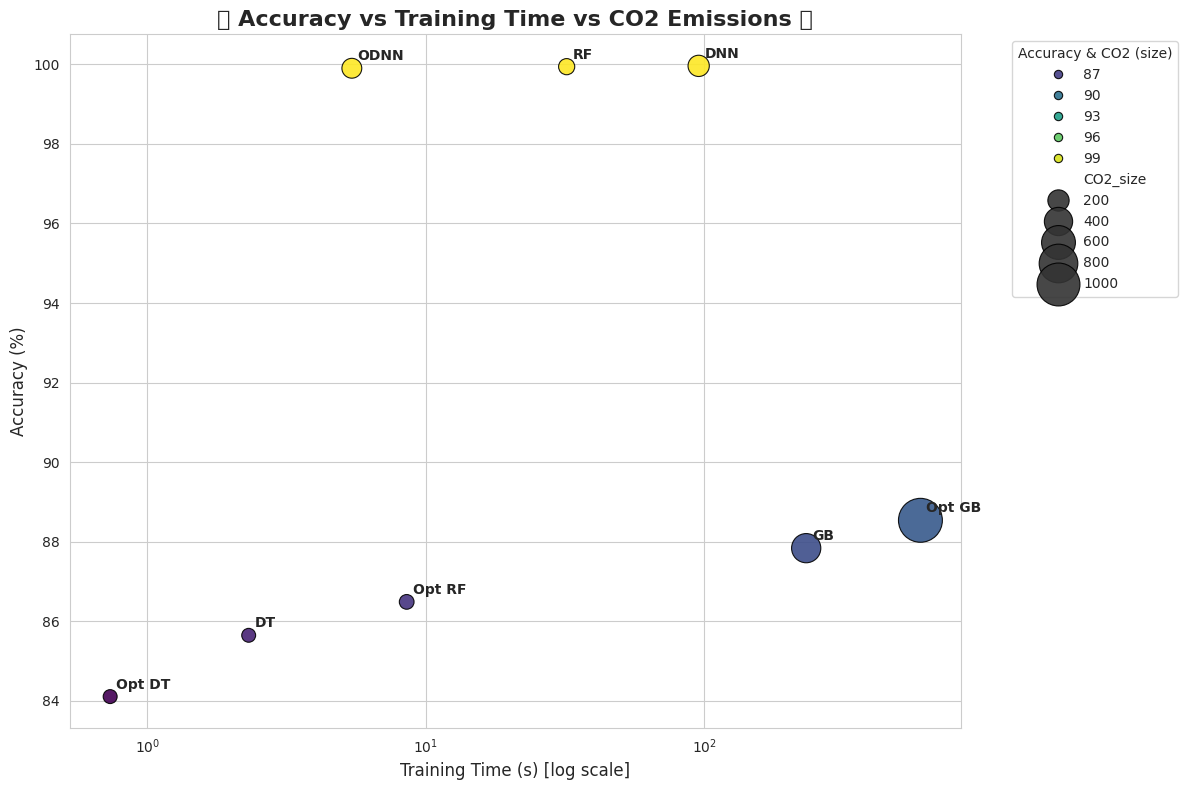

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    "Model": ["RF", "Opt RF", "DT", "Opt DT", "GB", "Opt GB", "DNN", "ODNN"],
    "Accuracy": [99.94, 86.49, 85.65, 84.11, 87.84, 88.54, 99.96, 99.90],
    "TrainingTime": [32.01, 8.53, 2.31, 0.735, 231.91, 596.35, 95.34, 5.42],
    "CO2": [9.29e-05, 3.31e-05, 1e-06, 3e-06, 8.88e-04, 0.00233, 0.000349, 0.000271]
}

df = pd.DataFrame(data)

# Scale CO2 for bubble size
df['CO2_size'] = df['CO2'] / df['CO2'].max() * 1000 + 50  # scale for visibility

# Plot
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")

scatter = sns.scatterplot(
    data=df,
    x="TrainingTime",
    y="Accuracy",
    size="CO2_size",
    hue="Accuracy",
    palette="viridis",
    sizes=(100, 1000),
    alpha=0.9,
    edgecolor="black"
)

# Log scales for better visibility
plt.xscale('log')
plt.yscale('linear')  # Accuracy is already 0-100%

# Annotate models
for i in range(df.shape[0]):
    plt.text(df.TrainingTime[i]*1.05, df.Accuracy[i]+0.2, df.Model[i], fontsize=10, weight='bold')

plt.xlabel("Training Time (s) [log scale]", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("✨ Accuracy vs Training Time vs CO2 Emissions ✨", fontsize=16, weight='bold')

# Legend tweaks
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=labels[1:], title="Accuracy & CO2 (size)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()